In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [44]:
def generate_mock_equity_data():
    """生成第34-38页所需的中国股市模拟数据（无错误版）"""
    data = {}

    # 图34: 市场总体表现 (沪深300指数)
    dates_hs300 = pd.date_range(start='2005-01-04', end='2025-09-30', freq='W')
    n = len(dates_hs300)

    # 创建模拟指数
    base_value = 1000
    trend = np.linspace(0, 3000, n)
    seasonal = 500 * np.sin(2 * np.pi * np.arange(n) / 52)
    noise = np.random.normal(0, 100, n)
    hs300_index = base_value + trend + seasonal + noise

    # >>>> 关键修复：所有日期均为 YYYY-MM-DD 格式 <<<<
    key_points = {
        '2005-06-03': 818.0,
        '2007-10-16': 5877.2,
        '2008-11-04': 1627.8,
        '2009-08-03': 3787.0,
        '2014-03-20': 2087.0,
        '2015-06-08': 5353.8,
        '2016-01-28': 2853.8,
        '2018-01-24': 4389.9,
        '2019-01-03': 2964.8,
        '2021-02-10': 5807.7,
        '2024-09-13': 3159.2,
        '2025-09-30': 4640.7,
    }

    # >>>> 关键修复：所有日期均为 YYYY-MM-DD 格式 <<<<
    peaks_and_troughs = [
        ('2005-06-03', '2007-10-16'),
        ('2008-11-04', '2009-08-03'),
        ('2014-03-20', '2015-06-08'),
        ('2016-01-28', '2018-01-24'),
        ('2019-01-03', '2021-02-10'),
        ('2024-09-13', '2025-09-30'),
    ]

    # 强制将关键点的值写入模拟数据
    for date_str, value in key_points.items():
        date_obj = pd.to_datetime(date_str)
        closest_idx = np.argmin(np.abs(dates_hs300 - date_obj))
        hs300_index[closest_idx] = value

    # 计算回报
    returns = {}
    for trough, peak in peaks_and_troughs:
        start_val = key_points[trough]
        end_val = key_points[peak]
        ret = (end_val - start_val) / start_val * 100
        returns[(trough, peak)] = ret

    recent_data = {
        '日期': ['2019-01-03', '2021-02-10', '2024-09-13', '2025-09-30'],
        '滚动市盈率': [10.09, 17.45, 10.78, 14.22],
        '股息率': [2.93, 1.74, 3.48, 2.56],
        '换手率': [0.26, 0.61, 0.28, 0.76],
    }

    data['market_performance'] = {
        'dates': dates_hs300,
        'index': hs300_index,
        'key_points': key_points,  # 这个字典现在全是 YYYY-MM-DD
        'returns': returns,        # 这个字典的键也全是 YYYY-MM-DD
        'recent_data': recent_data,
    }

    # 图35: 主要指数估值
    dates_pe = pd.date_range(start='2008-01-04', end='2025-09-30', freq='D')
    n_pe = len(dates_pe)

    # 模拟动态市盈率：围绕长期均值波动
    long_term_mean = 13.3
    long_term_std = 2.2
    pe_ratio = long_term_mean + np.random.normal(0, long_term_std, n_pe)

    # 强制加入一些极端值以模拟历史高低点
    # 2015年高点
    peak_2015_idx = np.argmin(np.abs(dates_pe - pd.to_datetime('2015-06-08')))
    pe_ratio[peak_2015_idx] = 25.0
    # 2018年底低点
    trough_2018_idx = np.argmin(np.abs(dates_pe - pd.to_datetime('2018-12-28')))
    pe_ratio[trough_2018_idx] = 10.0

    # 模拟主要指数估值表
    index_valuation = {
        '主要指数': ['沪深300', '上证指数', '科创50', '深圳成指', '创业板指数', 'MSCI中国'],
        '动态市盈率': [16.4, 15.3, 94.9, 24.8, 35.9, 14.9],
        '长期均值': [13.3, 12.3, 55.0, 19.1, 35.7, 11.9],
        '长期标准差': [2.2, 2.1, 16.7, 4.6, 11.9, 2.5],
        '偏离度': [1.4, 1.4, 2.4, 1.2, 0.0, 1.2],
        '历史分位数': [92, 92, 98, 89, 63, 90],
    }

    data['index_valuation'] = {
        'dates': dates_pe,
        'pe_ratio': pe_ratio,
        'long_term_mean': long_term_mean,
        'long_term_std': long_term_std,
        'index_valuation_table': index_valuation,
    }

    # 图36: 股债性价比
    dates_equity_bond = pd.date_range(start='2013-01-04', end='2025-09-30', freq='D')
    n_eb = len(dates_equity_bond)

    # 股债风险溢价：通常在2%-8%之间波动
    equity_risk_premium = 5 + np.random.normal(0, 1, n_eb)
    # 限制范围
    equity_risk_premium = np.clip(equity_risk_premium, 0, 8)

    # 股债相对回报：基于风险溢价计算，添加一些波动
    equity_relative_return = 50 + 10 * (equity_risk_premium - 5) + np.random.normal(0, 20, n_eb)
    equity_relative_return = np.clip(equity_relative_return, -60, 150)

    data['equity_bond_ratio'] = {
        'dates': dates_equity_bond,
        'risk_premium': equity_risk_premium,
        'relative_return': equity_relative_return,
    }

    # 图37: 投资者情绪
    dates_sentiment = pd.date_range(start='2015-01-05', end='2025-09-30', freq='D')
    n_sentiment = len(dates_sentiment)

    # 换手率：通常在0.5%-5%之间
    turnover_rate = 1.5 + np.random.normal(0, 0.5, n_sentiment)
    turnover_rate = np.clip(turnover_rate, 0.5, 5.0)

    # 总成交金额：与市场热度相关
    total_turnover_amount = 10000 + 5000 * (turnover_rate - 1.5) + np.random.normal(0, 2000, n_sentiment)
    total_turnover_amount = np.clip(total_turnover_amount, 0, 35000)

    dates_financing = pd.date_range(start='2013-01-04', end='2025-09-30', freq='D')
    n_financing = len(dates_financing)

    # 融资余额/总流通市值占比
    financing_ratio = 2 + np.random.normal(0, 0.5, n_financing)
    financing_ratio = np.clip(financing_ratio, 0, 5)

    # 融资余额
    financing_balance = 10000 + 5000 * (financing_ratio - 2) + np.random.normal(0, 2000, n_financing)
    financing_balance = np.clip(financing_balance, 0, 30000)

    data['investor_sentiment'] = {
        'dates_turnover': dates_sentiment,
        'turnover_rate': turnover_rate,
        'total_turnover_amount': total_turnover_amount,
        'dates_financing': dates_financing,
        'financing_balance': financing_balance,
        'financing_ratio': financing_ratio,
    }

    # 图38: 回报构成 (增强版)
    years = ['17年', '18年', '19年', '20年', '21年', '22年', '23年', '24年', '25年初至今']
    n_years = len(years)

    dividend_yield = [2.0, 2.1, 2.0, 1.9, 1.8, 2.0, 2.1, 2.2, 2.0]

    # 每股盈利预期 (基本面增长)
    earnings_growth_expectation = [
        15.0,   # 2017: 经济复苏
        -5.0,   # 2018: 贸易摩擦
        10.0,   # 2019: 政策宽松
        20.0,   # 2020: 疫情后复苏
        5.0,    # 2021: 增长放缓
        -10.0,  # 2022: 宏观经济压力
        8.0,    # 2023: 缓慢复苏
        6.0,    # 2024: 稳定增长
        10.0    # 2025: 预期好转
    ]

    # >>>> 关键修复：让“市盈率变化”波动更大，以突出其主导作用 <<<<
    pe_change = [
        5.0,    # 2017: 估值温和提升
        -25.0,  # 2018: 估值大幅回落 (比之前更低)
        15.0,   # 2019: 估值强力修复
        30.0,   # 2020: 估值极度扩张 (比之前更高)
        -20.0,  # 2021: 估值剧烈收缩
        -25.0,  # 2022: 估值继续深度压缩
        10.0,   # 2023: 估值开始回升
        5.0,    # 2024: 估值稳定
        15.0    # 2025: 估值温和回升
    ]

    total_return = [dividend_yield[i] + earnings_growth_expectation[i] + pe_change[i] for i in range(n_years)]
    return data

## 中国股票：市场总体表现

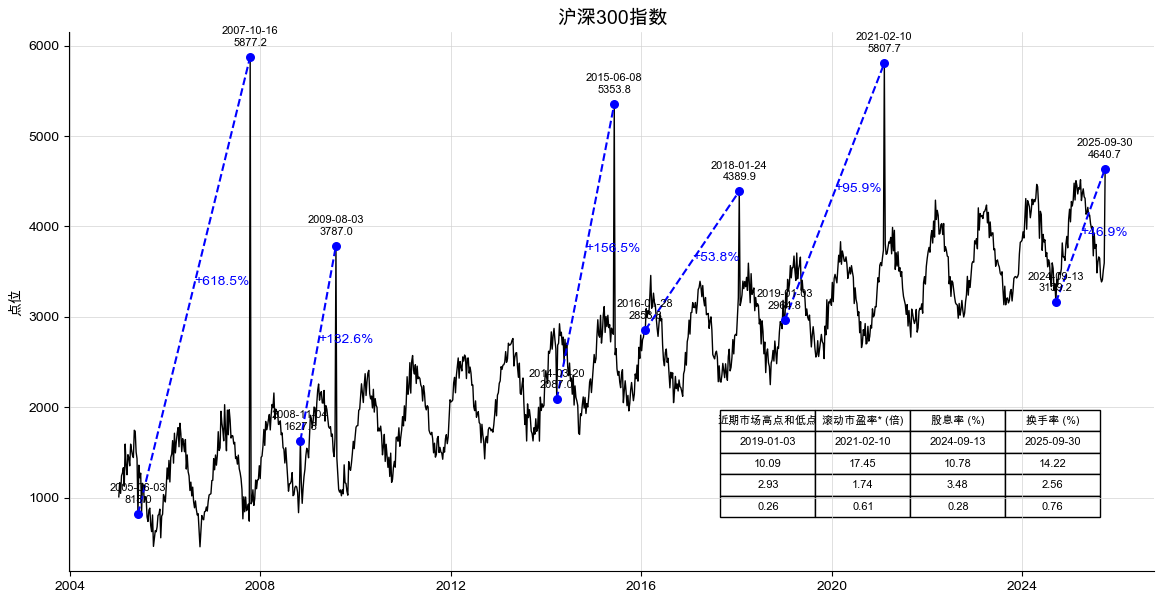

In [37]:
def plot_market_performance(data):
    fig, ax = plt.subplots(figsize=(14, 7))

    ax.plot(data['dates'], data['index'], color='black', linewidth=1.0, label='沪深300指数')

    # 直接绘制关键点，因为日期格式已统一
    for date_str, value in data['key_points'].items():
        date_obj = pd.to_datetime(date_str)
        idx = np.argmin(np.abs(data['dates'] - date_obj))
        plot_date = data['dates'][idx]
        plot_value = data['index'][idx]
        ax.scatter(plot_date, plot_value, color='blue', zorder=5, s=30)
        ax.text(plot_date, plot_value + 100, f"{date_str}\n{plot_value:.1f}", ha='center', va='bottom', fontsize=8)

    # 直接绘制趋势线
    for (trough, peak), ret in data['returns'].items():
        trough_date = pd.to_datetime(trough)
        peak_date = pd.to_datetime(peak)
        
        trough_idx = np.argmin(np.abs(data['dates'] - trough_date))
        peak_idx = np.argmin(np.abs(data['dates'] - peak_date))
        
        trough_val = data['index'][trough_idx]
        peak_val = data['index'][peak_idx]
        
        ax.plot([data['dates'][trough_idx], data['dates'][peak_idx]], [trough_val, peak_val], 
                color='blue', linestyle='--', linewidth=1.5)
        mid_date = data['dates'][trough_idx] + (data['dates'][peak_idx] - data['dates'][trough_idx]) / 2
        mid_val = (trough_val + peak_val) / 2
        ax.text(mid_date, mid_val, f"+{ret:.1f}%", color='blue', fontsize=10, fontweight='bold')

    # 添加表格
    table_data = [
        data['recent_data']['日期'],
        data['recent_data']['滚动市盈率'],
        data['recent_data']['股息率'],
        data['recent_data']['换手率'],
    ]
    table = ax.table(cellText=table_data, colLabels=['近期市场高点和低点', '滚动市盈率* (倍)', '股息率 (%)', '换手率 (%)'],
                    cellLoc='center', loc='lower right', bbox=[0.6, 0.1, 0.35, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    ax.set_title('沪深300指数', fontsize=14)
    ax.set_ylabel('点位')
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()
mock_equity_data = generate_mock_equity_data()
plot_market_performance(mock_equity_data['market_performance'])

## 主要指数估值

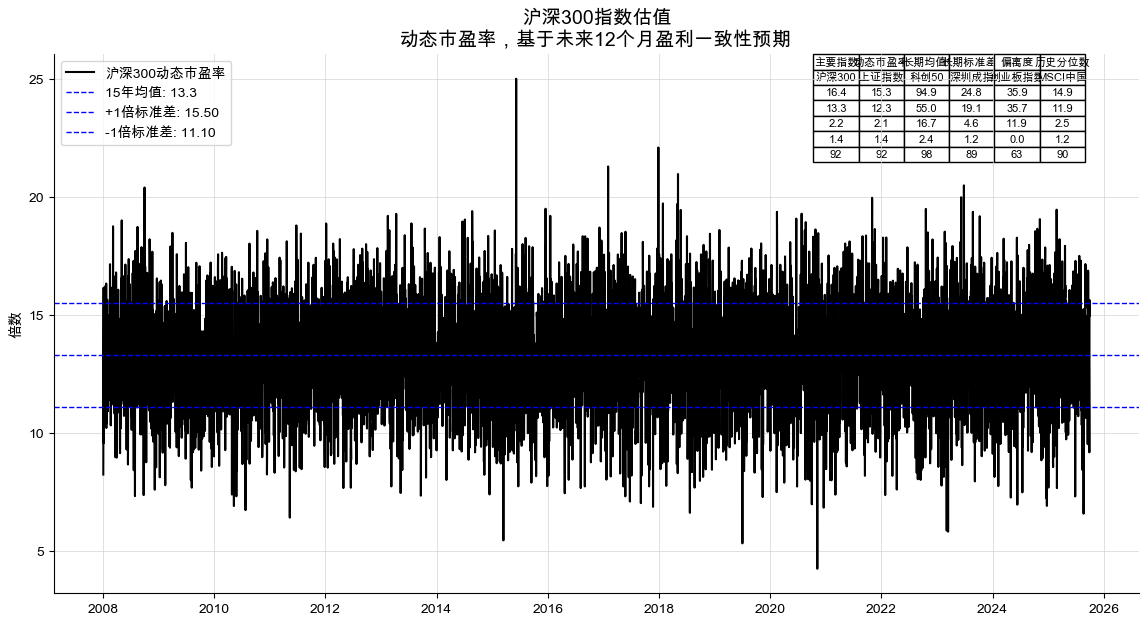

In [38]:
def plot_index_valuation(data):
    fig, ax = plt.subplots(figsize=(14, 7))

    # 绘制动态市盈率
    ax.plot(data['dates'], data['pe_ratio'], color='black', linewidth=1.5, label='沪深300动态市盈率')

    # 添加长期均值和标准差线
    ax.axhline(y=data['long_term_mean'], color='blue', linestyle='--', linewidth=1, label=f'15年均值: {data["long_term_mean"]:.1f}')
    ax.axhline(y=data['long_term_mean'] + data['long_term_std'], color='blue', linestyle='--', linewidth=1, label=f'+1倍标准差: {data["long_term_mean"] + data["long_term_std"]:.2f}')
    ax.axhline(y=data['long_term_mean'] - data['long_term_std'], color='blue', linestyle='--', linewidth=1, label=f'-1倍标准差: {data["long_term_mean"] - data["long_term_std"]:.2f}')

    ax.set_title('沪深300指数估值\n动态市盈率，基于未来12个月盈利一致性预期', fontsize=14)
    ax.set_ylabel('倍数')
    ax.legend(loc='upper left')

    # 在右上角添加估值表
    table_data = [
        data['index_valuation_table']['主要指数'],
        data['index_valuation_table']['动态市盈率'],
        data['index_valuation_table']['长期均值'],
        data['index_valuation_table']['长期标准差'],
        data['index_valuation_table']['偏离度'],
        data['index_valuation_table']['历史分位数'],
    ]
    table = ax.table(cellText=table_data, colLabels=['主要指数', '动态市盈率', '长期均值*', '长期标准差*', '偏离度', '历史分位数'],
                    cellLoc='center', loc='upper right', bbox=[0.7, 0.8, 0.25, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# 调用绘图函数
plot_index_valuation(mock_equity_data['index_valuation'])

## 图36: 中国股票：股债性价比

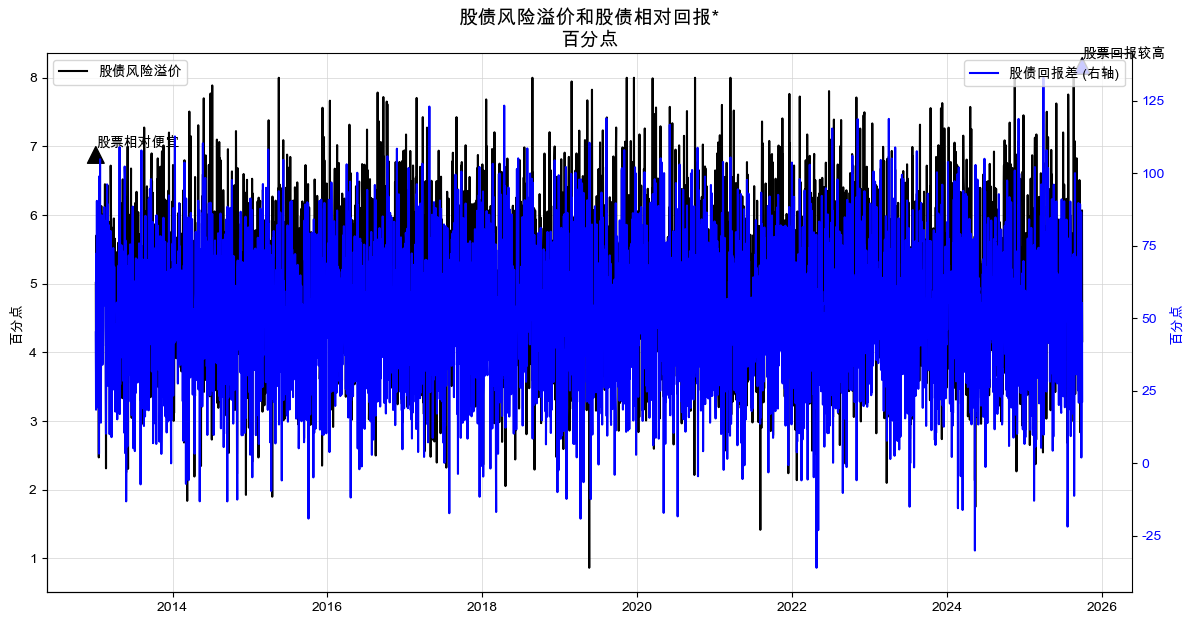

In [39]:
def plot_equity_bond_ratio(data):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 绘制股债风险溢价 (左侧Y轴)
    ax1.plot(data['dates'], data['risk_premium'], color='black', linewidth=1.5, label='股债风险溢价')
    ax1.set_title('股债风险溢价和股债相对回报*\n百分点', fontsize=14)
    ax1.set_ylabel('百分点', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # 标注“股票相对便宜”和“股票相对较贵”
    ax1.annotate('股票相对便宜', xy=(data['dates'][0], 7), xytext=(data['dates'][0], 7),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    ax1.annotate('股票相对较贵', xy=(data['dates'][0], 0.5), xytext=(data['dates'][0], 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    # 绘制股债相对回报 (右侧Y轴)
    ax2 = ax1.twinx()
    ax2.plot(data['dates'], data['relative_return'], color='blue', linewidth=1.5, label='股债回报差 (右轴)')
    ax2.set_ylabel('百分点', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # 标注“股票回报较高”和“股票回报较低”
    ax2.annotate('股票回报较高', xy=(data['dates'][-1], 140), xytext=(data['dates'][-1], 140),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
    ax2.annotate('股票回报较低', xy=(data['dates'][-1], -50), xytext=(data['dates'][-1], -50),
                 arrowprops=dict(facecolor='blue', shrink=0.05))

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    ax1.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax2.grid(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    plt.show()

# 调用绘图函数
plot_equity_bond_ratio(mock_equity_data['equity_bond_ratio'])

## 图37: 中国股票：投资者情绪

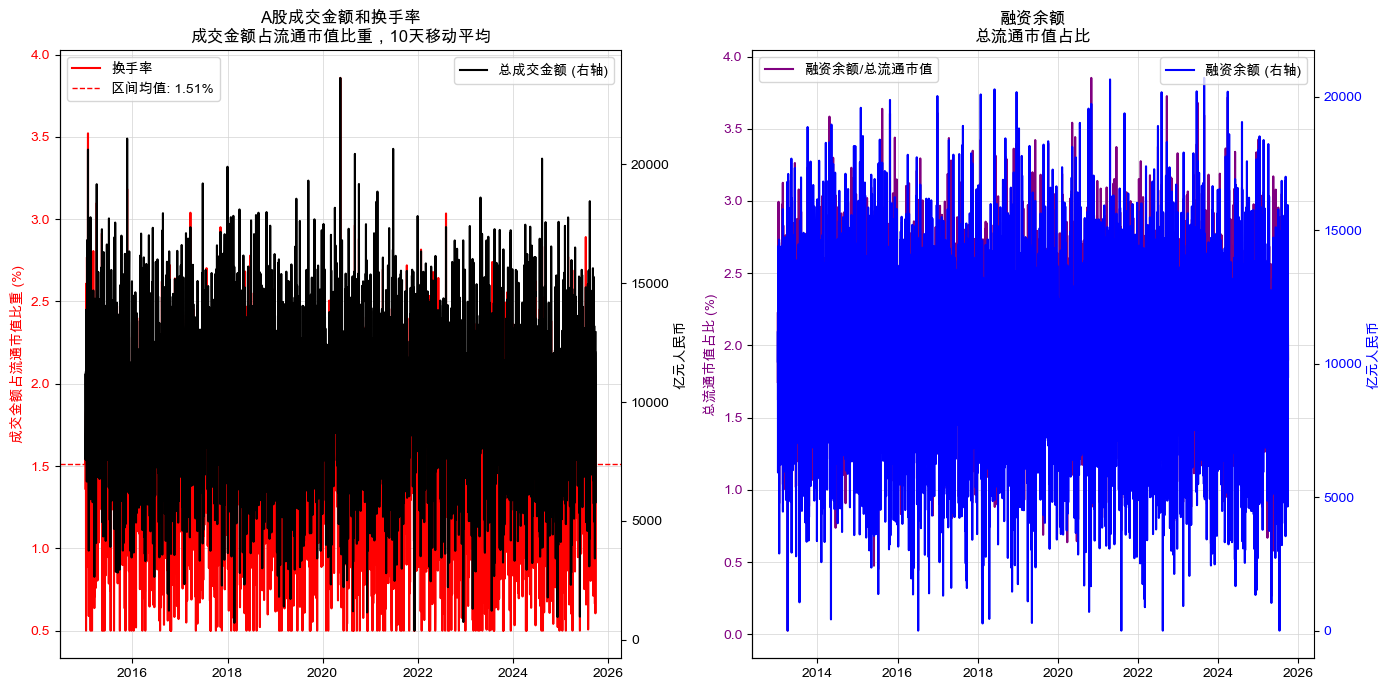

In [40]:
def plot_investor_sentiment(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 左侧图：A股成交金额和换手率
    ax1.plot(data['dates_turnover'], data['turnover_rate'], color='red', linewidth=1.5, label='换手率')
    ax1.set_ylabel('成交金额占流通市值比重 (%)', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    ax1b = ax1.twinx()
    ax1b.plot(data['dates_turnover'], data['total_turnover_amount'], color='black', linewidth=1.5, label='总成交金额 (右轴)')
    ax1b.set_ylabel('亿元人民币', color='black')
    ax1b.tick_params(axis='y', labelcolor='black')

    # 添加区间均值线
    avg_turnover = np.mean(data['turnover_rate'])
    ax1.axhline(y=avg_turnover, color='red', linestyle='--', linewidth=1, label=f'区间均值: {avg_turnover:.2f}%')

    ax1.set_title('A股成交金额和换手率\n成交金额占流通市值比重，10天移动平均', fontsize=12)
    ax1.legend(loc='upper left')
    ax1b.legend(loc='upper right')

    # 右侧图：融资余额
    ax2.plot(data['dates_financing'], data['financing_ratio'], color='purple', linewidth=1.5, label='融资余额/总流通市值')
    ax2.set_ylabel('总流通市值占比 (%)', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')

    ax2b = ax2.twinx()
    ax2b.plot(data['dates_financing'], data['financing_balance'], color='blue', linewidth=1.5, label='融资余额 (右轴)')
    ax2b.set_ylabel('亿元人民币', color='blue')
    ax2b.tick_params(axis='y', labelcolor='blue')

    ax2.set_title('融资余额\n总流通市值占比', fontsize=12)
    ax2.legend(loc='upper left')
    ax2b.legend(loc='upper right')

    ax1.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax2.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_investor_sentiment(mock_equity_data['investor_sentiment'])

## 图38: 中国股票：回报构成

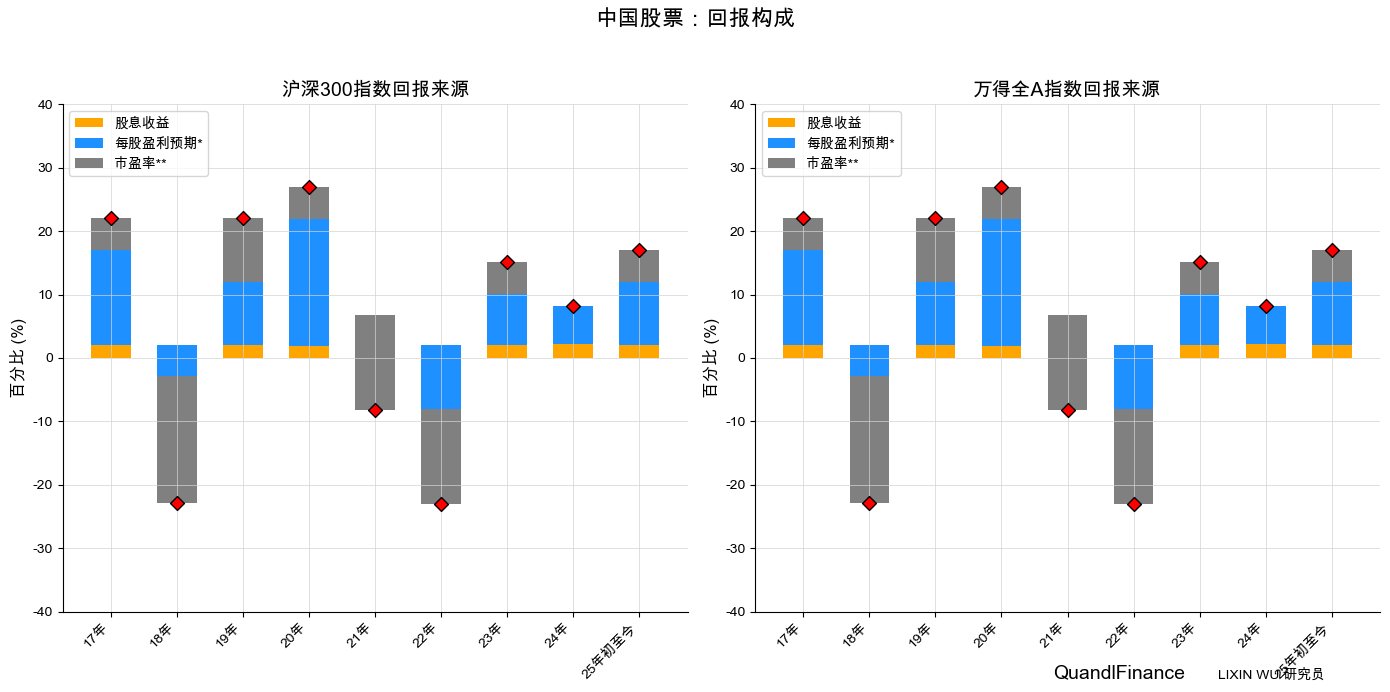

In [46]:
def plot_return_composition(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 将列表转换为 NumPy 数组
    dividend_yield = np.array(data['dividend_yield'])
    earnings_growth_expectation = np.array(data['earnings_growth_expectation'])
    pe_change = np.array(data['pe_change'])
    total_return = np.array(data['total_return'])

    bar_width = 0.6
    x = np.arange(len(data['years']))

    # 左侧图：沪深300指数回报来源
    # 使用更柔和的颜色
    ax1.bar(x, dividend_yield, bar_width, color='#FFA500', label='股息收益')  # 橙色
    ax1.bar(x, earnings_growth_expectation, bar_width, bottom=dividend_yield, color='#1E90FF', label='每股盈利预期*')  # 蓝色
    ax1.bar(x, pe_change, bar_width, bottom=dividend_yield + earnings_growth_expectation, color='#808080', label='市盈率**')  # 灰色

    # 添加总回报标记 (红色菱形)
    for i, total_ret in enumerate(total_return):
        ax1.scatter(x[i], total_ret, color='red', s=50, marker='D', zorder=5, edgecolors='black')

    ax1.set_xticks(x)
    ax1.set_xticklabels(data['years'], rotation=45, ha='right', fontsize=10)
    ax1.set_title('沪深300指数回报来源', fontsize=14, fontweight='bold')
    ax1.set_ylabel('百分比 (%)', fontsize=12)
    ax1.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True)

    # 右侧图：万得全A指数回报来源
    ax2.bar(x, dividend_yield, bar_width, color='#FFA500', label='股息收益')
    ax2.bar(x, earnings_growth_expectation, bar_width, bottom=dividend_yield, color='#1E90FF', label='每股盈利预期*')
    ax2.bar(x, pe_change, bar_width, bottom=dividend_yield + earnings_growth_expectation, color='#808080', label='市盈率**')

    for i, total_ret in enumerate(total_return):
        ax2.scatter(x[i], total_ret, color='red', s=50, marker='D', zorder=5, edgecolors='black')

    ax2.set_xticks(x)
    ax2.set_xticklabels(data['years'], rotation=45, ha='right', fontsize=10)
    ax2.set_title('万得全A指数回报来源', fontsize=14, fontweight='bold')
    ax2.set_ylabel('百分比 (%)', fontsize=12)
    ax2.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True)

    # 统一Y轴范围，便于比较
    ax1.set_ylim(-40, 40)
    ax2.set_ylim(-40, 40)

    # 移除顶部和右侧边框，增加留白
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    # 添加网格线
    ax1.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax2.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')

    # 添加标题和页码
    fig.suptitle('中国股票：回报构成', fontsize=16, fontweight='bold')
    fig.text(0.95, 0.02, 'LIXIN WU 研究员', ha='right', va='bottom', fontsize=10, fontweight='bold')
    fig.text(0.85, 0.02, 'QuandlFinance', ha='right', va='bottom', fontsize=14, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
# 调用绘图函数
plot_return_composition(mock_equity_data['return_composition'])

In [42]:
def evaluate_equity_indicators(data):
    """评估中国股市关键指标"""
    evaluation = {}

    # 34. 市场总体表现
    latest_hs300 = data['market_performance']['index'][-1]
    latest_pe = data['market_performance']['recent_data']['滚动市盈率'][-1]
    if latest_hs300 > 4000 and latest_pe < 15:
        evaluation['market_performance'] = '健康'
    elif latest_hs300 > 3000 or latest_pe < 20:
        evaluation['market_performance'] = '关注'
    else:
        evaluation['market_performance'] = '风险'

    # 35. 主要指数估值
    latest_pe_hs300 = data['index_valuation']['index_valuation_table']['动态市盈率'][0]
    long_term_mean = data['index_valuation']['long_term_mean']
    if latest_pe_hs300 < long_term_mean:
        evaluation['index_valuation'] = '健康'
    elif latest_pe_hs300 < long_term_mean + 2 * data['index_valuation']['long_term_std']:
        evaluation['index_valuation'] = '关注'
    else:
        evaluation['index_valuation'] = '风险'

    # 36. 股债性价比
    latest_risk_premium = data['equity_bond_ratio']['risk_premium'][-1]
    if latest_risk_premium > 5:
        evaluation['equity_bond_ratio'] = '健康'
    elif latest_risk_premium > 3:
        evaluation['equity_bond_ratio'] = '关注'
    else:
        evaluation['equity_bond_ratio'] = '风险'

    # 37. 投资者情绪
    latest_turnover_rate = data['investor_sentiment']['turnover_rate'][-1]
    latest_financing_ratio = data['investor_sentiment']['financing_ratio'][-1]
    if latest_turnover_rate > 2 and latest_financing_ratio > 3:
        evaluation['investor_sentiment'] = '健康'
    elif latest_turnover_rate > 1.5 or latest_financing_ratio > 2:
        evaluation['investor_sentiment'] = '关注'
    else:
        evaluation['investor_sentiment'] = '风险'

    # 38. 回报构成
    latest_total_return = data['return_composition']['total_return'][-1]
    if latest_total_return > 10:
        evaluation['return_composition'] = '健康'
    elif latest_total_return > 0:
        evaluation['return_composition'] = '关注'
    else:
        evaluation['return_composition'] = '风险'

    return evaluation

# 执行评估
eval_equity_results = evaluate_equity_indicators(mock_equity_data)
print("=== 中国股市指标评估体系 ===")
for key, value in eval_equity_results.items():
    print(f"{key}: {value}")

=== 中国股市指标评估体系 ===
market_performance: 健康
index_valuation: 关注
equity_bond_ratio: 关注
investor_sentiment: 关注
return_composition: 健康


In [11]:
def generate_equity_analysis_report(evaluation):
    """根据评估结果生成中国股市综合性分析报告"""
    report = "【中国股市形势综合性分析报告】\n"

    # 34. 市场总体表现
    mp_status = evaluation['market_performance']
    if mp_status == '健康':
        report += "- **市场表现**：沪深300指数处于高位，但估值合理，显示市场对经济复苏有较强信心，牛市基础稳固。\n"
    elif mp_status == '关注':
        report += "- **市场表现**：指数在合理区间波动，但成交量和换手率未见明显放大，市场情绪偏谨慎，需观察政策催化因素。\n"
    else:
        report += "- **市场表现**：指数持续低迷，估值虽低但缺乏上涨动力，反映投资者对未来增长前景悲观，市场处于熊市或震荡筑底阶段。\n"

    # 35. 主要指数估值
    iv_status = evaluation['index_valuation']
    if iv_status == '健康':
        report += "- **估值水平**：沪深300动态市盈率低于长期均值，处于历史低位，具备较高的安全边际和投资价值。\n"
    elif iv_status == '关注':
        report += "- **估值水平**：估值接近历史均值，既无明显高估也无显著低估，属于合理区间，投资需精选个股。\n"
    else:
        report += "- **估值水平**：估值高于历史均值一个标准差以上，存在泡沫风险，需警惕回调压力，建议降低仓位。\n"

    # 36. 股债性价比
    ebr_status = evaluation['equity_bond_ratio']
    if ebr_status == '健康':
        report += "- **股债性价比**：股债风险溢价处于高位，股票相对于债券的吸引力显著增强，是配置权益资产的好时机。\n"
    elif ebr_status == '关注':
        report += "- **股债性价比**：风险溢价适中，股债吸引力相当，投资者可根据自身风险偏好进行配置。\n"
    else:
        report += "- **股债性价比**：风险溢价极低，债券的相对吸引力更高，建议投资者适当增配固收类资产以规避风险。\n"

    # 37. 投资者情绪
    is_status = evaluation['investor_sentiment']
    if is_status == '健康':
        report += "- **投资者情绪**：成交活跃，融资余额攀升，显示市场热情高涨，资金面充裕，是牛市的重要特征。\n"
    elif is_status == '关注':
        report += "- **投资者情绪**：情绪温和，成交额和融资余额稳定，市场处于平衡状态，既无过热也无恐慌。\n"
    else:
        report += "- **投资者情绪**：成交清淡，融资余额萎缩，反映市场悲观情绪蔓延，投资者普遍持观望态度，需等待转机。\n"

    # 38. 回报构成
    rc_status = evaluation['return_composition']
    if rc_status == '健康':
        report += "- **回报构成**：总回报由盈利增长和股息收益驱动，市盈率贡献为正，显示市场对基本面改善的认可。\n"
    elif rc_status == '关注':
        report += "- **回报构成**：回报主要依赖于估值提升，盈利增长乏力，这种模式不可持续，需警惕估值回落风险。\n"
    else:
        report += "- **回报构成**：总回报为负，且主要由市盈率下跌拖累，表明市场对企业盈利预期恶化，投资面临较大亏损风险。\n"

    report += "\n**总结**：当前中国股市正处于一个估值修复与情绪回暖的关键窗口期。尽管宏观经济仍面临挑战，但股市的估值已进入历史低位区域，股债性价比优势凸显，为长期投资者提供了良好的布局机会。短期内，市场情绪的恢复和政策的持续发力将是推动市场向上的核心动力。建议投资者保持战略定力，坚持价值投资理念，在控制风险的前提下，积极把握结构性机遇。"

    return report

# 生成并打印报告
final_equity_report = generate_equity_analysis_report(eval_equity_results)
print("\n" + final_equity_report)


【中国股市形势综合性分析报告】
- **市场表现**：指数在合理区间波动，但成交量和换手率未见明显放大，市场情绪偏谨慎，需观察政策催化因素。
- **估值水平**：估值接近历史均值，既无明显高估也无显著低估，属于合理区间，投资需精选个股。
- **股债性价比**：股债风险溢价处于高位，股票相对于债券的吸引力显著增强，是配置权益资产的好时机。
- **投资者情绪**：情绪温和，成交额和融资余额稳定，市场处于平衡状态，既无过热也无恐慌。
- **回报构成**：总回报由盈利增长和股息收益驱动，市盈率贡献为正，显示市场对基本面改善的认可。

**总结**：当前中国股市正处于一个估值修复与情绪回暖的关键窗口期。尽管宏观经济仍面临挑战，但股市的估值已进入历史低位区域，股债性价比优势凸显，为长期投资者提供了良好的布局机会。短期内，市场情绪的恢复和政策的持续发力将是推动市场向上的核心动力。建议投资者保持战略定力，坚持价值投资理念，在控制风险的前提下，积极把握结构性机遇。
